In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import math
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

# for min_max scaling
from sklearn.preprocessing import MinMaxScaler

# Import models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# Import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
data = pd.read_csv('Melbourne_housing_FULL.csv', low_memory=False)

In [4]:
data.head()

Suburb           Address  Rooms Type Method        SellerG      Date  \
0    Abbotsford     68 Studley St      2    h     SS         Jellis  3/9/2016   
1  Airport West     154 Halsey Rd      3    t     PI         Nelson  3/9/2016   
2   Albert Park    105 Kerferd Rd      2    h      S  hockingstuart  3/9/2016   
3   Albert Park  85 Richardson St      2    h      S        Thomson  3/9/2016   
4    Alphington      30 Austin St      3    h     SN        McGrath  3/9/2016   

   Distance  Postcode  Bedroom  ...  Landsize  BuildingArea  YearBuilt  \
0       2.5    3067.0      2.0  ...     126.0           inf        NaN   
1      13.5    3042.0      3.0  ...     303.0           225     2016.0   
2       3.3    3206.0      2.0  ...     120.0            82     1900.0   
3       3.3    3206.0      2.0  ...     159.0           inf        NaN   
4       6.4    3078.0      3.0  ...     174.0           122     2003.0   

                  CouncilArea  Latitude Longtitude             Regionname  \
0          Yarra City Council  -37.8014   144.9958  Northern Metropolitan   
1  Moonee Valley City Council  -37.7180   144.8780   Western Metropolitan   
2   Port Phillip City Council  -37.8459   144.9555  Southern Metropolitan   
3   Port Phillip City Council  -37.8450   144.9538  Southern Metropolitan   
4        Darebin City Council  -37.7818   145.0198  Northern Metropolitan   

   Propertycount      ParkingArea      Price  
0         4019.0          Carport        NaN  
1         3464.0  Detached Garage   840000.0  
2         3280.0  Attached Garage  1275000.0  
3         3280.0           Indoor  1455000.0  
4         2211.0          Parkade        NaN  

[5 rows x 22 columns]

In [5]:
data.shape

(34857, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [7]:
# Select columns with data type 'object'
columns_to_convert = data.select_dtypes(include=['object']).columns

# Apply the mask to select the columns and convert object columns to categorical 
# to get advantage for memory usage, performance and better semantics.
data[columns_to_convert] = data[columns_to_convert].astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Method         34857 non-null  category
 5   SellerG        34857 non-null  category
 6   Date           34857 non-null  category
 7   Distance       34856 non-null  float64 
 8   Postcode       34856 non-null  float64 
 9   Bedroom        26640 non-null  float64 
 10  Bathroom       26631 non-null  float64 
 11  Car            26129 non-null  float64 
 12  Landsize       23047 non-null  float64 
 13  BuildingArea   13760 non-null  category
 14  YearBuilt      15551 non-null  float64 
 15  CouncilArea    34854 non-null  category
 16  Latitude       26881 non-null  float64 
 17  Longtitude     26881 non-null  

In [9]:
# Count the number of missing data
data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [10]:
# Check duplicate rows
data[data.duplicated()]

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Method, SellerG, Date, Distance, Postcode, Bedroom, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Latitude, Longtitude, Regionname, Propertycount, ParkingArea, Price]
Index: []

[0 rows x 22 columns]

In [11]:
# Checking unique values of categorical columns
categorical_columns = data.select_dtypes(include=['category']).columns

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f'Column "{column}" unique values: {unique_values}')

Column "Suburb" unique values: ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington', 'Altona', ..., 'Eynesbury', 'Gisborne South', 'croydon', 'Monbulk', 'viewbank']
Length: 351
Categories (351, object): ['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale', ..., 'Yarra Glen', 'Yarraville', 'croydon', 'viewbank']
Column "Address" unique values: ['68 Studley St', '154 Halsey Rd', '105 Kerferd Rd', '85 Richardson St', '30 Austin St', ..., '18 Elinda Pl', '14 Stainsby Cr', '8 Bellbird Ct', '30 Waddington Cr', '42 Pascoe St']
Length: 34009
Categories (34009, object): ['1 Abercrombie St', '1 Aberfeldie Wy', '1 Acacia St', '1 Acheron Av', ..., '9b Bewdley St', '9b Latham St', '9b Marquis Rd', '9b Stewart St']
Column "Type" unique values: ['h', 't', 'u']
Categories (3, object): ['h', 't', 'u']
Column "Method" unique values: ['SS', 'PI', 'S', 'SN', 'VB', 'SP', 'W', 'PN', 'SA']
Categories (9, object): ['PI', 'PN', 'S', 'SA', ..., 'SP', 'SS', 'VB', 'W']
Column "SellerG" unique values: ['

In [12]:
data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [13]:
# Remove features that has a very weak correlation with price, address is not necessary
data.drop(columns=["Postcode", "Landsize", "BuildingArea", 
                 "Latitude", "Longtitude", "Propertycount"], inplace=True)

In [14]:
data.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Method             0
SellerG            0
Date               0
Distance           1
Bedroom         8217
Bathroom        8226
Car             8728
YearBuilt      19306
CouncilArea        3
Regionname         0
ParkingArea        0
Price           7610
dtype: int64

In [15]:
# Fill the missing values of Bathroom and Car with mode
data['Bathroom'].fillna(data['Bathroom'].mode()[0], inplace=True)
data['Car'].fillna(data['Car'].mode()[0], inplace=True)

In [16]:
# Check the common value of Bedroom by grouping Rooms and Type
data[["Rooms", "Type","Bedroom"]].groupby(["Type","Rooms"]).agg(pd.Series.mode)

Bedroom
Type Rooms                 
h    1                  1.0
     2                  2.0
     3                  3.0
     4                  4.0
     5                  5.0
     6                  6.0
     7                  7.0
     8                  8.0
     9           [1.0, 9.0]
     10                10.0
     12                12.0
     16                16.0
t    1                  1.0
     2                  2.0
     3                  3.0
     4                  4.0
     5                  5.0
     6                  NaN
     7                  NaN
     8                  8.0
     9                   []
     10                 NaN
     12                 NaN
     16                 NaN
u    1                  1.0
     2                  2.0
     3                  3.0
     4                  4.0
     5                  5.0
     6      [3.0, 4.0, 6.0]
     7                  NaN
     8                  4.0
     9                  NaN
     10                 NaN
     12                 NaN
     16                 NaN

In [17]:
# Replace missing room values with Bedroom if any.
missing_room_idx=data.loc[data["Rooms"].isna()]["Rooms"].index.tolist()

for i in missing_room_idx:
    data.loc[i, "Rooms"] = data._get_value(i, "Bedroom")

In [18]:
# Delete the remaining rows with missing room and bedroom
data.dropna(axis=0, subset="Rooms", inplace=True)
data.drop(columns=["Bedroom"], inplace=True)

In [19]:
data.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Method             0
SellerG            0
Date               0
Distance           1
Bathroom           0
Car                0
YearBuilt      19306
CouncilArea        3
Regionname         0
ParkingArea        0
Price           7610
dtype: int64

In [20]:
data.describe()

Rooms      Distance      Bathroom           Car     YearBuilt  \
count  34857.000000  34856.000000  34857.000000  34857.000000  15551.000000   
mean       3.031012     11.184929      1.477350      1.796741   1965.289885   
std        0.969933      6.788892      0.686361      0.882969     37.328178   
min        1.000000      0.000000      0.000000      0.000000   1196.000000   
25%        2.000000      6.400000      1.000000      1.000000   1940.000000   
50%        3.000000     10.300000      1.000000      2.000000   1970.000000   
75%        4.000000     14.000000      2.000000      2.000000   2000.000000   
max       16.000000     48.100000     12.000000     26.000000   2106.000000   

              Price  
count  2.724700e+04  
mean   1.050173e+06  
std    6.414671e+05  
min    8.500000e+04  
25%    6.350000e+05  
50%    8.700000e+05  
75%    1.295000e+06  
max    1.120000e+07

In [21]:
# Check missing Regionname rows.
data.loc[data["CouncilArea"].isna()]

Suburb           Address  Rooms Type Method SellerG        Date  \
10019   Camberwell   2/3 Kingsley St      2    h     VB  Jellis  11/11/2017   
12355  Fawkner Lot      1/3 Brian St      3    h     SP    Brad    6/1/2018   
15180    Footscray  2/16 Stafford St      2    u      S     Jas  15/07/2017   

       Distance  Bathroom  Car  YearBuilt CouncilArea             Regionname  \
10019       7.7       1.0  2.0        NaN         NaN  Northern Metropolitan   
12355       NaN       1.0  2.0        NaN         NaN  Northern Metropolitan   
15180       5.1       1.0  2.0        NaN         NaN  Northern Metropolitan   

           ParkingArea     Price  
10019          Carport  825000.0  
12355  Detached Garage  616000.0  
15180  Attached Garage  710000.0

In [22]:
# Replace missing CouncilArea with the most common value that is in same suburb
data.loc[18523 ,"CouncilArea"] = data[data["Suburb"] == "Footscray"]["CouncilArea"].mode()[0]
data.loc[26888 ,"CouncilArea"] = data[data["Suburb"] == "Camberwell"]["CouncilArea"].mode()[0]
data.loc[29483 ,"CouncilArea"] = data[data["Address"].str.contains("Brian St")]["CouncilArea"].mode()[0]

In [23]:
# Find max distance of houses by grouping YearBuilt.
grouped_yearBuilt_by_distance=data[["Distance", "YearBuilt"]].groupby("YearBuilt").max()

# Since distance and yearbuilt have a strong correlation with each other than the others, 
# we can replace missing null distance values with checking same yearbuilt.
for k1, v1 in data[data["Distance"].isna()][["Distance", "YearBuilt"]].iterrows():
    for year, val in grouped_yearBuilt_by_distance.iterrows():
        if(v1["YearBuilt"] == year):
            data.at[k1, "Distance"] = val["Distance"]

In [24]:
# Check remaining missing values
data.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Method             0
SellerG            0
Date               0
Distance           1
Bathroom           0
Car                0
YearBuilt      19306
CouncilArea        3
Regionname         0
ParkingArea        0
Price           7610
dtype: int64

In [25]:
# Remove all rows that has missing val in Distance
# Yearbuilt has a lot of missing values so it will be discarded
# Address is not necessary because of suburb and regionname features
# Date is not necessary
data.dropna(axis=0, subset="Distance", inplace=True)
data.drop(["Address", "YearBuilt", "Date"],axis=1,inplace=True)

In [26]:
# Find mean price of houses by grouping Rooms and Regionname 
grouped_price=data[["Price", "Rooms", "Regionname"]].groupby(["Rooms", "Regionname"]).agg("mean")

# Replace missing null price with others in same regionname and same room numbers
for k1, v1 in data[data["Price"].isna()].iterrows():
    for k2, v2 in grouped_price.iterrows():
        if(v1["Rooms"] == k2[0] and v1["Regionname"] == k2[1]):
            data.at[k1, "Price"] = v2["Price"]

In [27]:
# Check remaining missing values
data.isna().sum()

Suburb         0
Rooms          0
Type           0
Method         0
SellerG        0
Distance       0
Bathroom       0
Car            0
CouncilArea    2
Regionname     0
ParkingArea    0
Price          9
dtype: int64

In [28]:
# Drop missing all rows in Price
data.dropna(axis=0, subset="Price", inplace=True)
data.dropna(axis=0, subset="CouncilArea", inplace=True)

In [29]:
# Check remaining missing values
data.isna().sum()

Suburb         0
Rooms          0
Type           0
Method         0
SellerG        0
Distance       0
Bathroom       0
Car            0
CouncilArea    0
Regionname     0
ParkingArea    0
Price          0
dtype: int64

In [30]:
# Final data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34845 entries, 0 to 34856
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Suburb       34845 non-null  category
 1   Rooms        34845 non-null  int64   
 2   Type         34845 non-null  category
 3   Method       34845 non-null  category
 4   SellerG      34845 non-null  category
 5   Distance     34845 non-null  float64 
 6   Bathroom     34845 non-null  float64 
 7   Car          34845 non-null  float64 
 8   CouncilArea  34845 non-null  category
 9   Regionname   34845 non-null  category
 10  ParkingArea  34845 non-null  category
 11  Price        34845 non-null  float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 1.9 MB


## Data Visualization

## Lineplot

Text(0.5, 1.0, 'Lineplot for the comparison of Price and Rooms with hue parameter as Type')

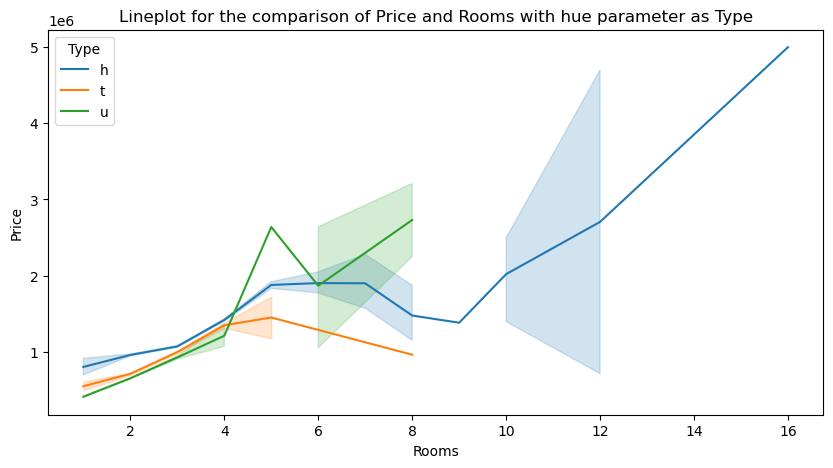

In [31]:
plt.figure(figsize = (10,5))
sns.lineplot(data = data , x = 'Rooms' , y = 'Price', hue='Type')
plt.ylabel('Price')
plt.title('Lineplot for the comparison of Price and Rooms with hue parameter as Type')

## Histpot

<Axes: xlabel='Price', ylabel='Count'>

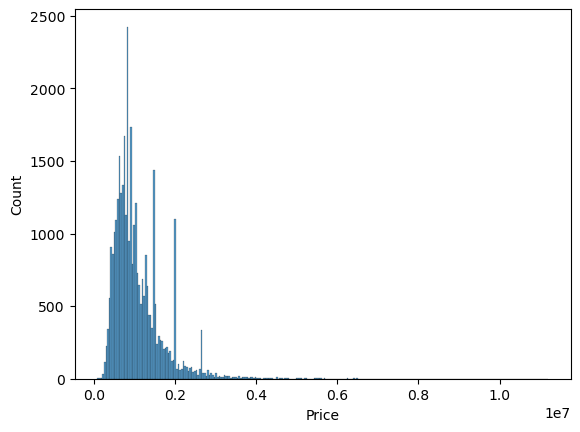

In [32]:
# Creates histogram to see price distribution
sns.histplot(data=data["Price"] )

<Axes: xlabel='Price', ylabel='Count'>

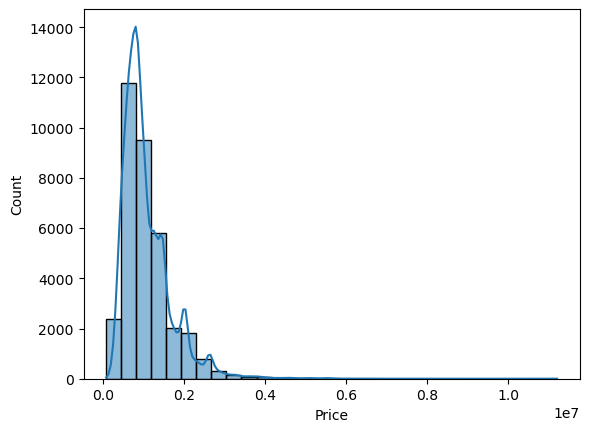

In [33]:
# Creates histogram to see price distribution
sns.histplot(data=data["Price"], kde=True, bins= 30 )

<Axes: title={'center': 'Car with Price'}, xlabel='Car', ylabel='Price'>

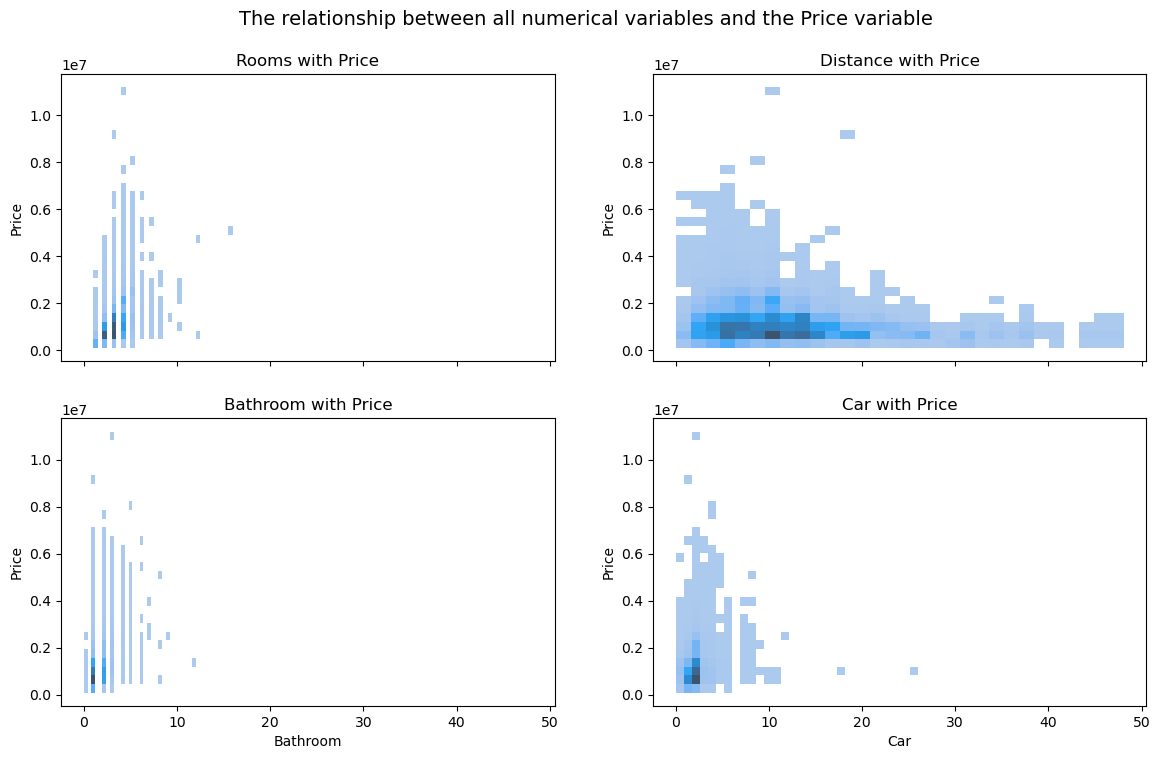

In [34]:
# Creates histogram to the relationships between numerical columns with price
fig, axes = plt.subplots(2,2, sharex=True, figsize=(14,8))
plt.subplots_adjust(top=0.90)
fig.suptitle('The relationship between all numerical variables and the Price variable', fontsize=14)
axes[0,0].set_title('Rooms with Price')
sns.histplot(ax=axes[0,0], data=data, y="Price", x="Rooms", bins= 30)

axes[0,1].set_title('Distance with Price')
sns.histplot(ax=axes[0,1], data=data, y="Price", x="Distance", bins= 30)

axes[1,0].set_title('Bathroom with Price')
sns.histplot(ax=axes[1,0], data=data, y="Price", x="Bathroom", bins= 30)

axes[1,1].set_title('Car with Price')
sns.histplot(ax=axes[1,1], data=data, y="Price", x="Car", bins= 30)

<Axes: xlabel='Regionname', ylabel='Price'>

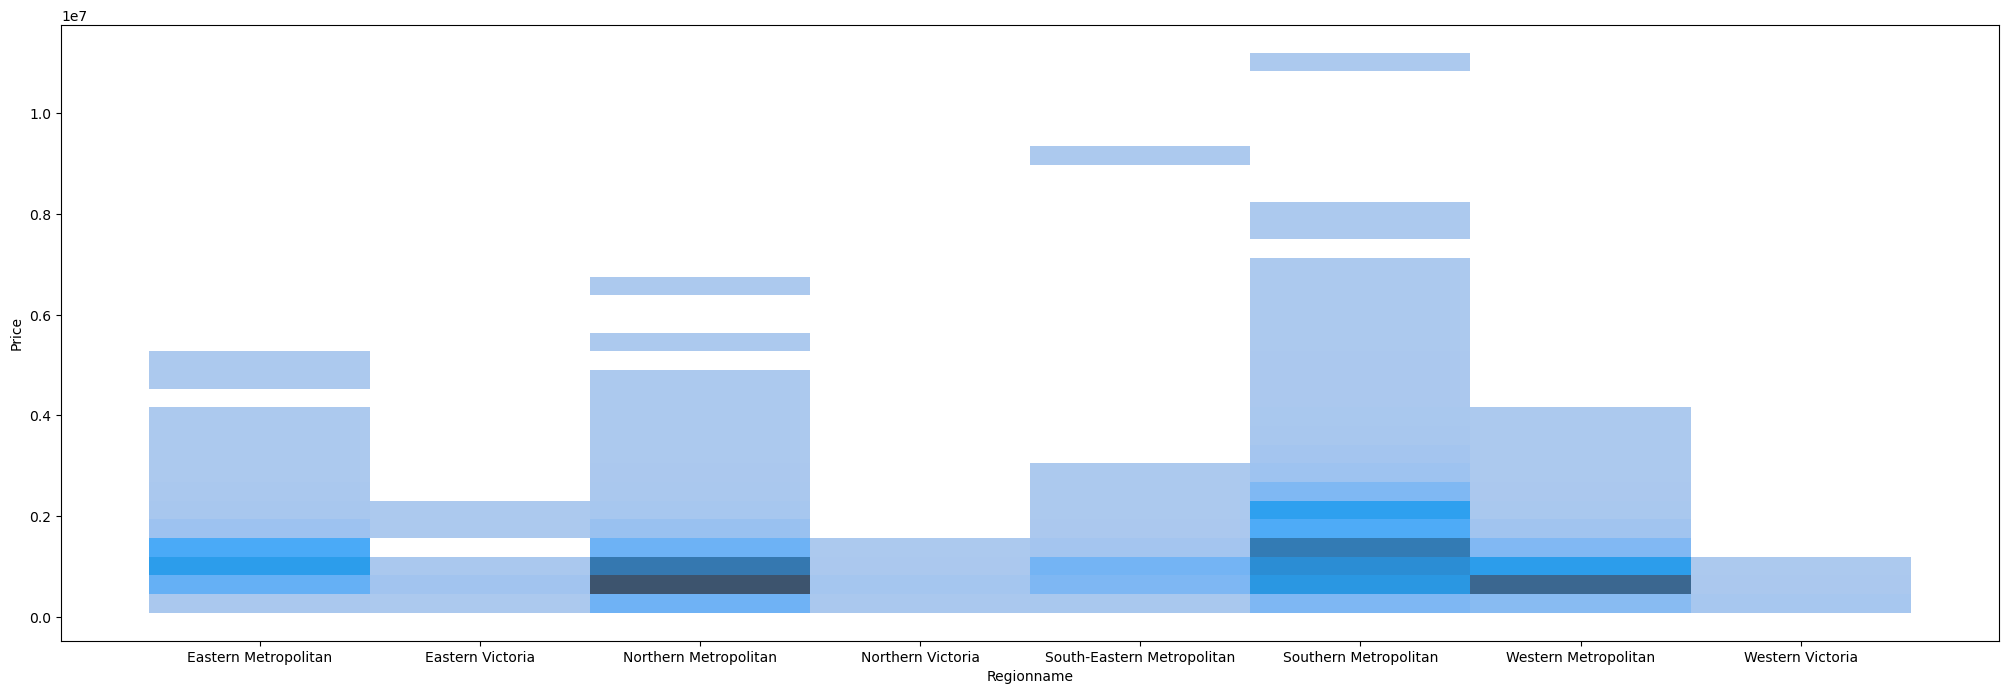

In [35]:
plt.figure(figsize=(25,8))
sns.histplot(data=data, x='Regionname', y='Price', bins= 30)

<Axes: xlabel='Type', ylabel='Price'>

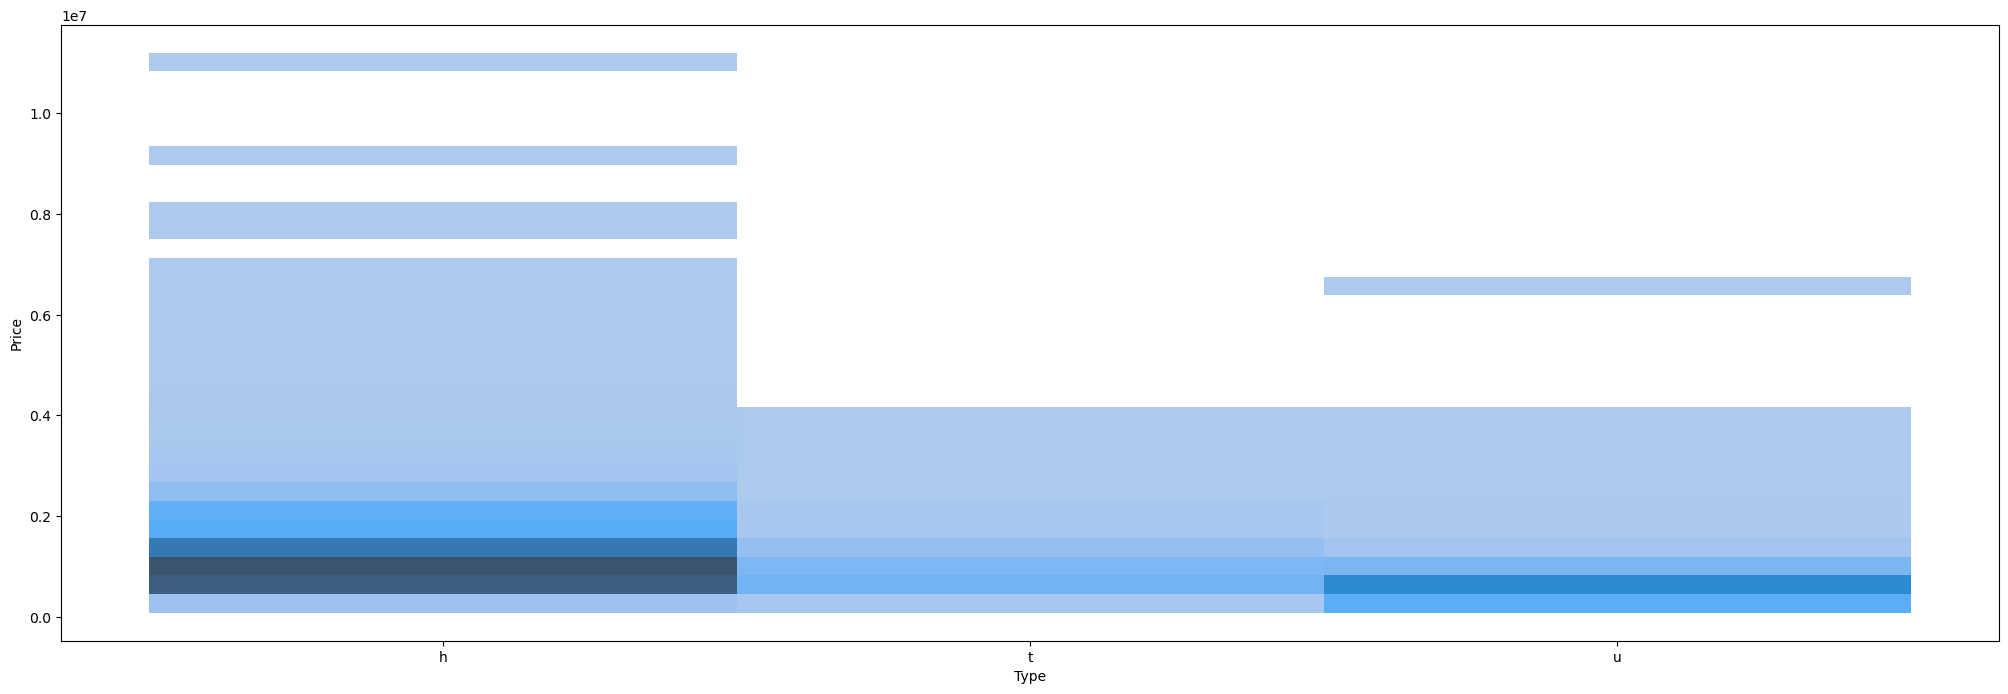

In [36]:
plt.figure(figsize=(25,8))
sns.histplot(data=data, x='Type', y='Price', bins= 30)

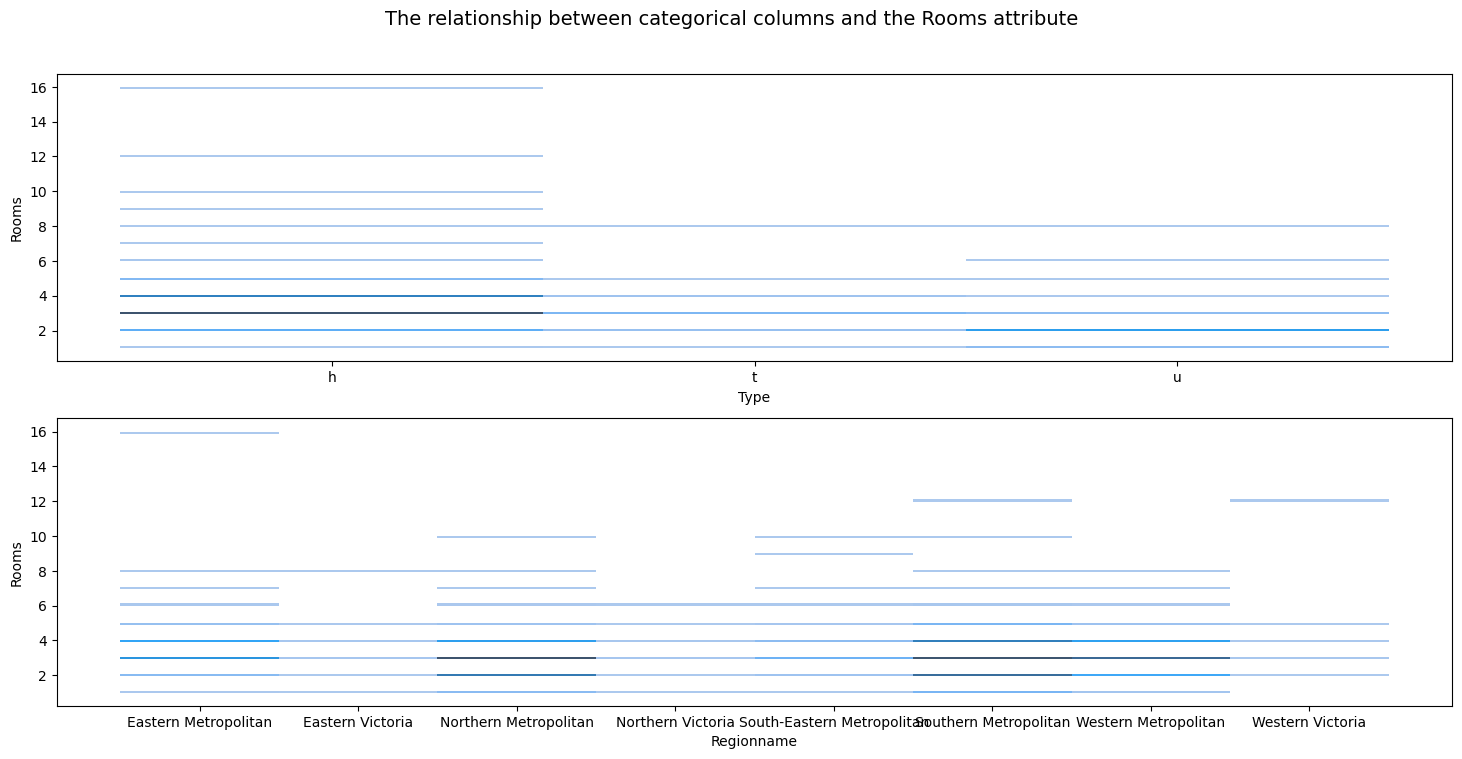

In [37]:
fig, axes = plt.subplots(2,1, figsize=(18,8))
plt.subplots_adjust(top=0.90)
fig.suptitle('The relationship between categorical columns and the Rooms attribute', fontsize=14)
plt.subplot(2,1,1)
sns.histplot(data=data, y="Rooms", x="Type")

plt.subplot(2,1,2)
sns.histplot(data=data, y="Rooms", x="Regionname")
 
plt.show()


## Boxplot

<Axes: >

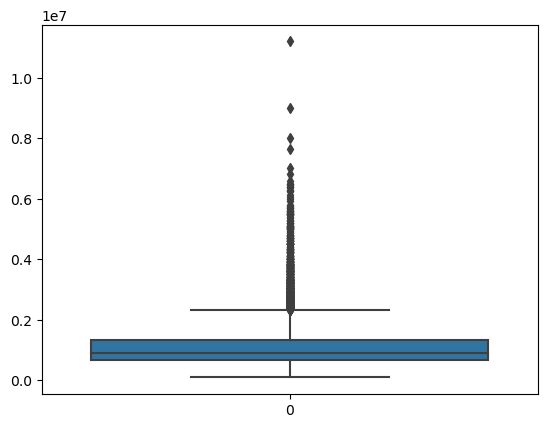

In [38]:
# Creates boxplt to see price distribution
sns.boxplot(data=data["Price"] )

<Axes: xlabel='Car', ylabel='Price'>

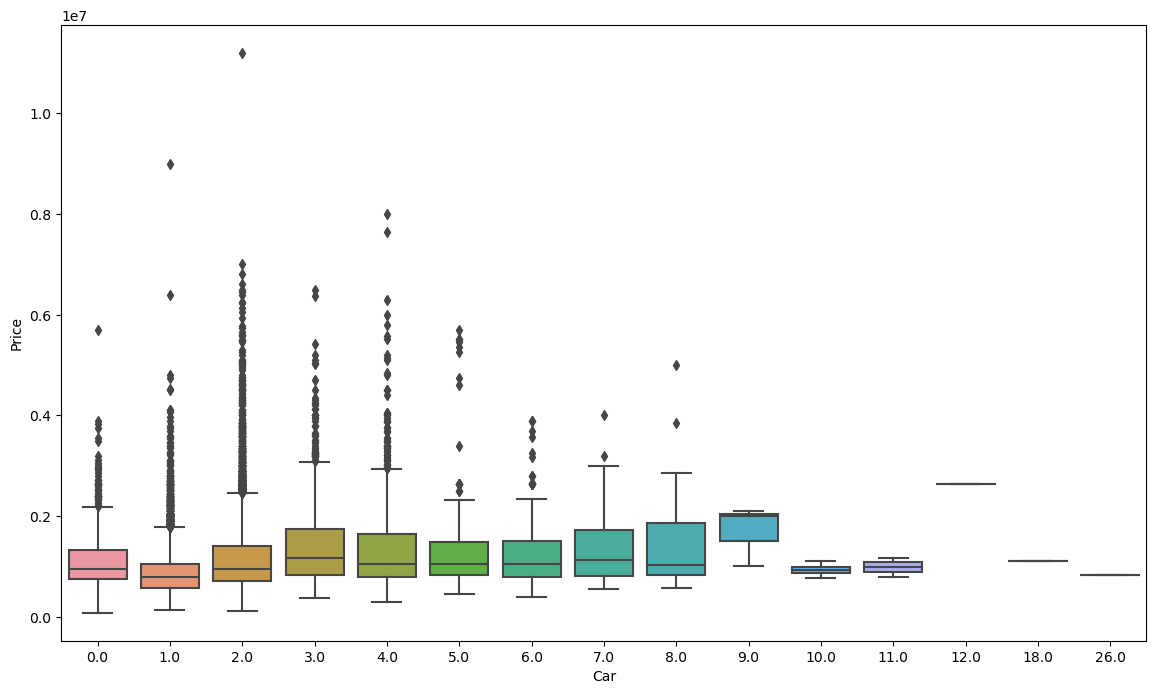

In [39]:
# creating a boxplot with seaborn
plt.figure(figsize=(14,8))
sns.boxplot(data=data, x='Car', y='Price')

<Axes: title={'center': 'Car with Price'}, xlabel='Car', ylabel='Price'>

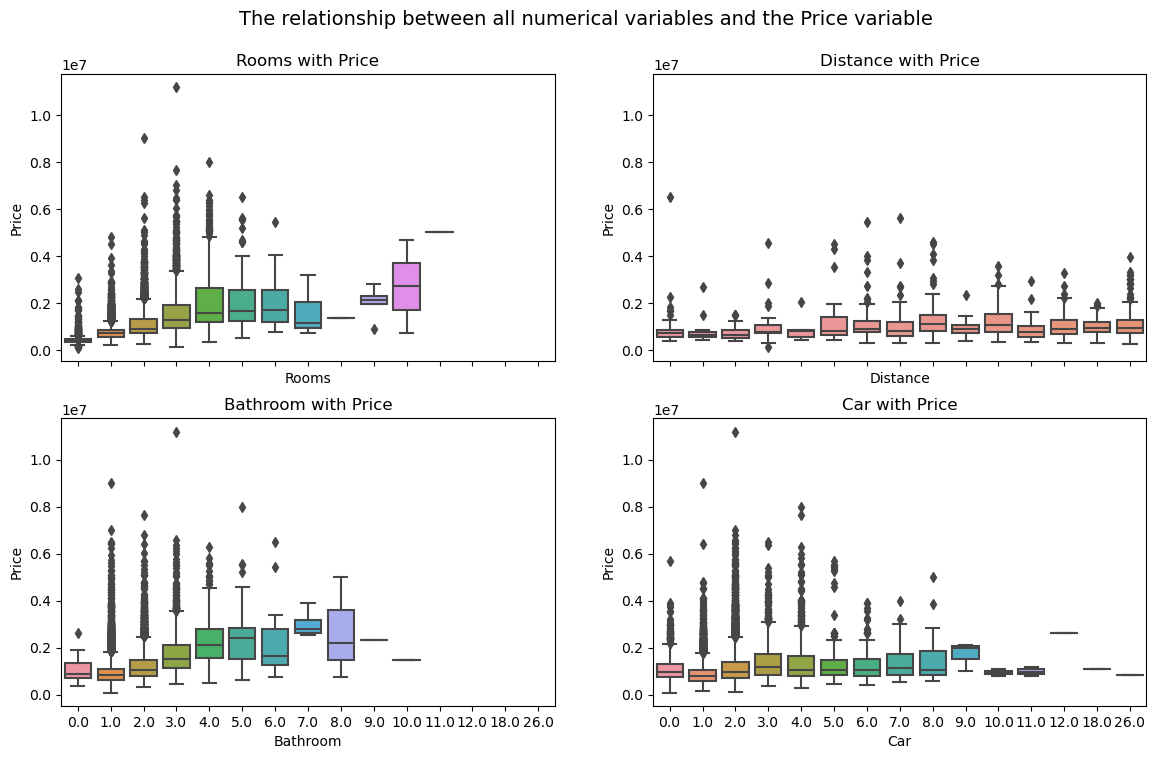

In [40]:
fig, axes = plt.subplots(2,2, sharex=True, figsize=(14,8))
plt.subplots_adjust(top=0.90)
fig.suptitle('The relationship between all numerical variables and the Price variable', fontsize=14)
axes[0,0].set_title('Rooms with Price')
sns.boxplot(ax=axes[0,0], data=data, y="Price", x="Rooms")

axes[0,1].set_title('Distance with Price')
sns.boxplot(ax=axes[0,1], data=data, y="Price", x="Distance")

axes[1,0].set_title('Bathroom with Price')
sns.boxplot(ax=axes[1,0], data=data, y="Price", x="Bathroom")

axes[1,1].set_title('Car with Price')
sns.boxplot(ax=axes[1,1], data=data, y="Price", x="Car")

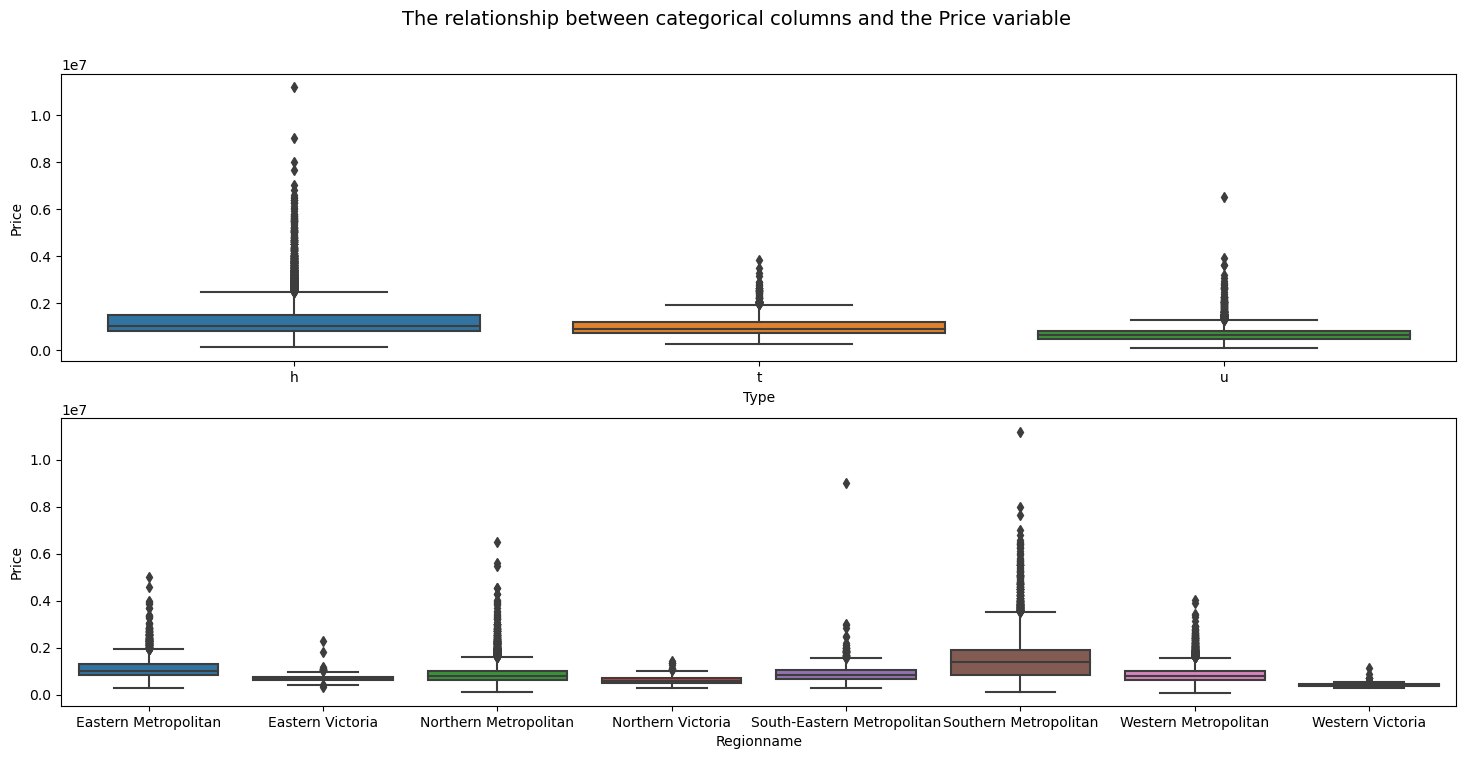

In [41]:
fig, axes = plt.subplots(2,1, figsize=(18,8))
plt.subplots_adjust(top=0.90)
fig.suptitle('The relationship between categorical columns and the Price variable', fontsize=14)
plt.subplot(2,1,1)
sns.boxplot(data=data, y="Price", x="Type")

plt.subplot(2,1,2)
sns.boxplot(data=data, y="Price", x="Regionname")
 
plt.show()



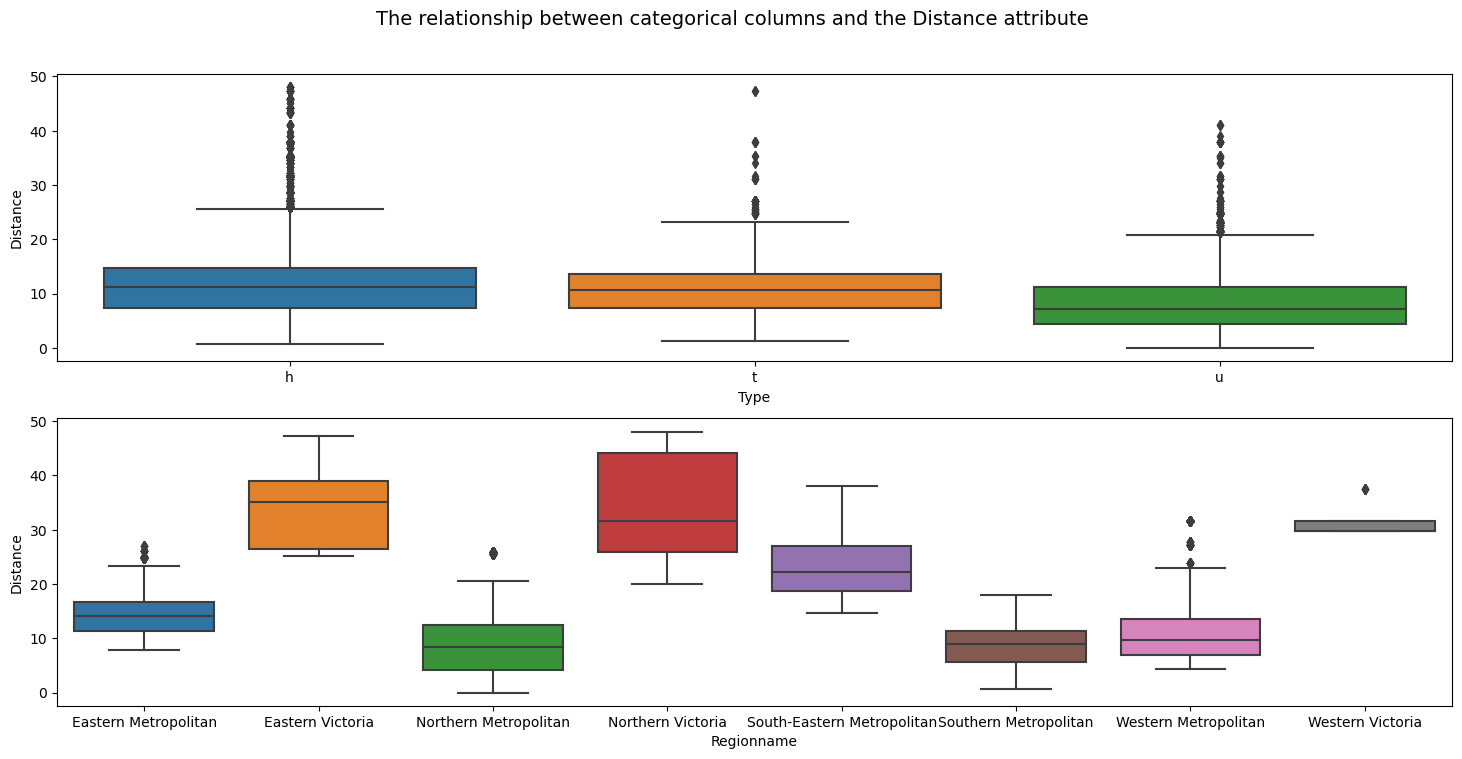

In [42]:
fig, axes = plt.subplots(2,1, figsize=(18,8))
plt.subplots_adjust(top=0.90)
fig.suptitle('The relationship between categorical columns and the Distance attribute', fontsize=14)
plt.subplot(2,1,1)
sns.boxplot(data=data, y="Distance", x="Type")

plt.subplot(2,1,2)
sns.boxplot(data=data, y="Distance", x="Regionname")
 
plt.show()



## Violinplot

<Axes: >

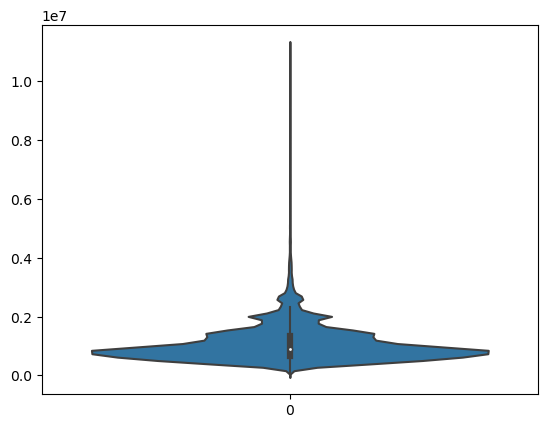

In [43]:
# Creates violinplt to see price distribution
sns.violinplot(data=data["Price"] )

<Axes: xlabel='Rooms', ylabel='Price'>

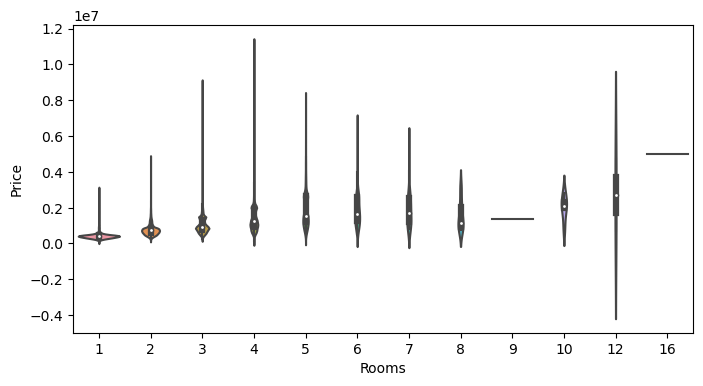

In [44]:
# creating a violinplot with seaborn
plt.figure(figsize=(8,4))
sns.violinplot(data=data, x='Rooms', y='Price')

<Axes: xlabel='Regionname', ylabel='Price'>

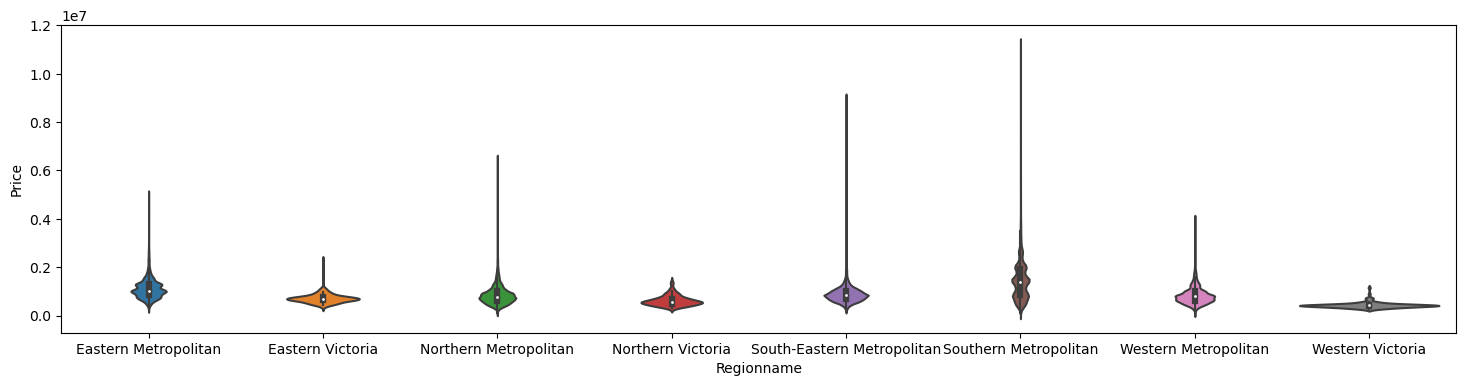

In [45]:
# creating a violinplot with seaborn
plt.figure(figsize=(18,4))
sns.violinplot(data=data, x='Regionname', y='Price')

<Axes: xlabel='Type', ylabel='Rooms'>

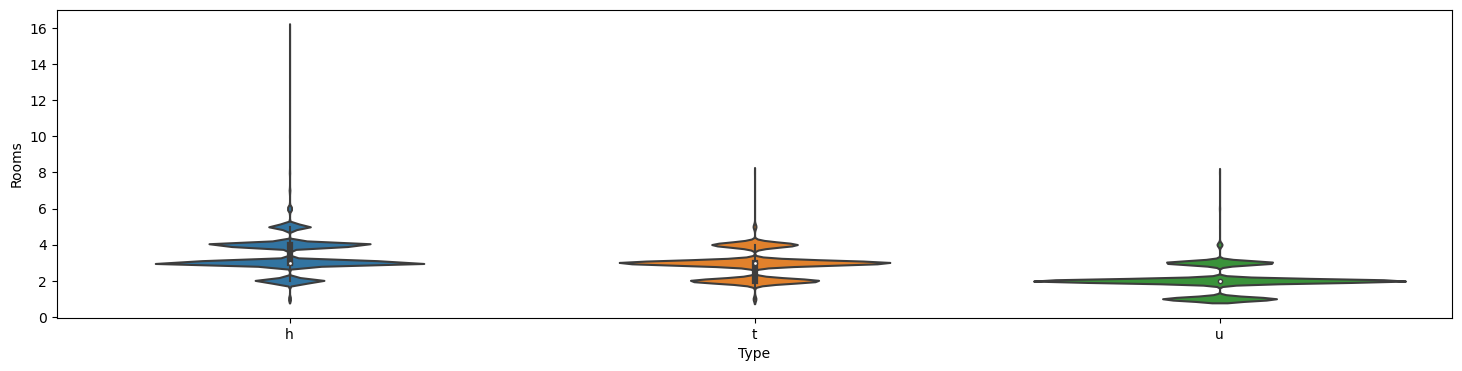

In [46]:
# creating a violinplot with seaborn
plt.figure(figsize=(18,4))
sns.violinplot(data=data, x='Type', y='Rooms')

## To get vertical plot by assigning numerical value to y-axis

<Axes: xlabel='Rooms', ylabel='Type'>

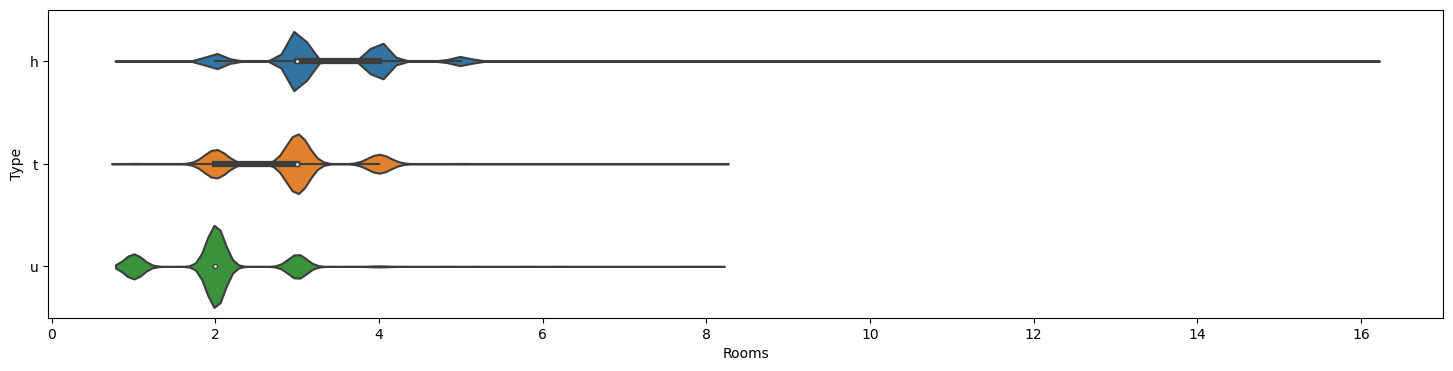

In [47]:
# creating a violinplot with seaborn
plt.figure(figsize=(18,4))
sns.violinplot(data=data, x='Rooms', y='Type')

## Countplot

In [48]:
data

Suburb  Rooms Type Method        SellerG  Distance  Bathroom  \
0            Abbotsford      2    h     SS         Jellis       2.5       1.0   
1          Airport West      3    t     PI         Nelson      13.5       2.0   
2           Albert Park      2    h      S  hockingstuart       3.3       1.0   
3           Albert Park      2    h      S        Thomson       3.3       1.0   
4            Alphington      3    h     SN        McGrath       6.4       2.0   
...                 ...    ...  ...    ...            ...       ...       ...   
34852         Reservoir      3    u     SP             RW      12.0       1.0   
34853     Roxburgh Park      4    h      S          Raine      20.6       2.0   
34854  Springvale South      4    h     PI          Barry      22.2       2.0   
34855  Springvale South      3    h      S      Harcourts      22.2       2.0   
34856       Westmeadows      4    h      S          Barry      16.5       2.0   

       Car                     CouncilArea                  Regionname  \
0      1.0              Yarra City Council       Northern Metropolitan   
1      1.0      Moonee Valley City Council        Western Metropolitan   
2      0.0       Port Phillip City Council       Southern Metropolitan   
3      0.0       Port Phillip City Council       Southern Metropolitan   
4      1.0            Darebin City Council       Northern Metropolitan   
...    ...                             ...                         ...   
34852  1.0            Darebin City Council       Northern Metropolitan   
34853  2.0               Hume City Council       Northern Metropolitan   
34854  2.0  Greater Dandenong City Council  South-Eastern Metropolitan   
34855  1.0  Greater Dandenong City Council  South-Eastern Metropolitan   
34856  6.0               Hume City Council       Northern Metropolitan   

           ParkingArea         Price  
0              Carport  7.432265e+05  
1      Detached Garage  8.400000e+05  
2      Attached Garage  1.275000e+06  
3               Indoor  1.455000e+06  
4              Parkade  9.051467e+05  
...                ...           ...  
34852          Parkade  4.750000e+05  
34853      Underground  5.910000e+05  
34854          Carport  1.033385e+06  
34855  Detached Garage  7.805000e+05  
34856  Attached Garage  7.910000e+05  

[34845 rows x 12 columns]

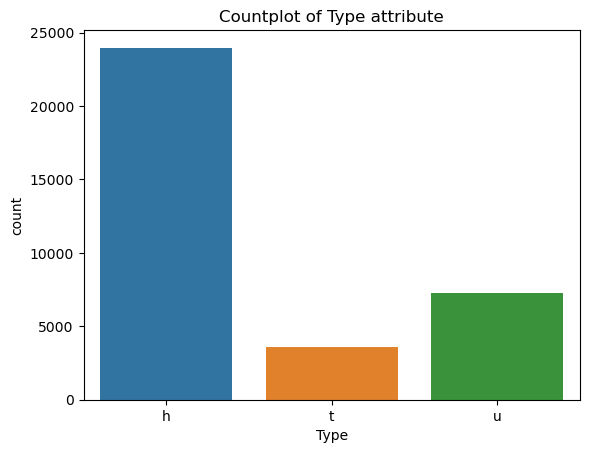

In [49]:
plt.title("Countplot of Type attribute")
sns.countplot(data = data, x='Type')
plt.show()

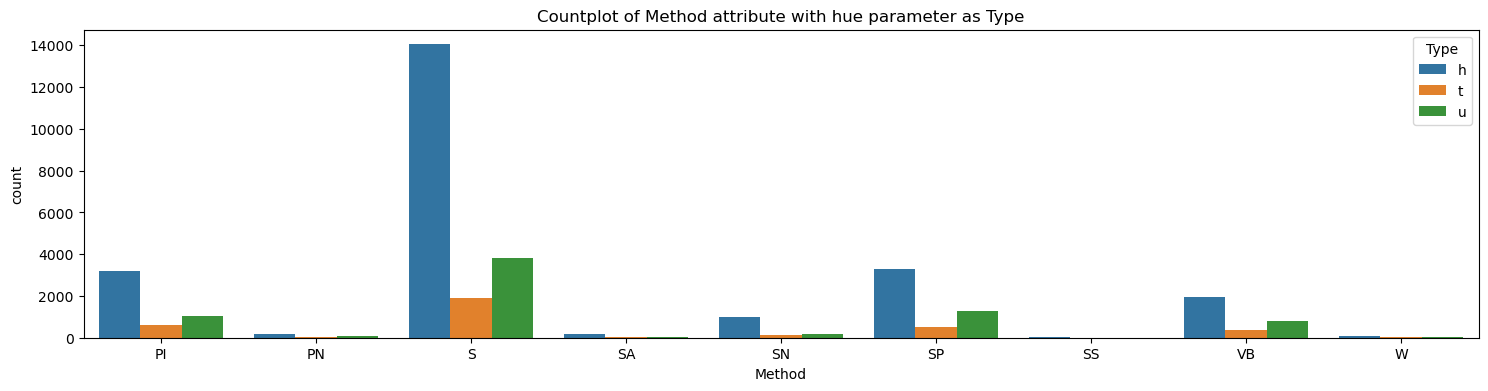

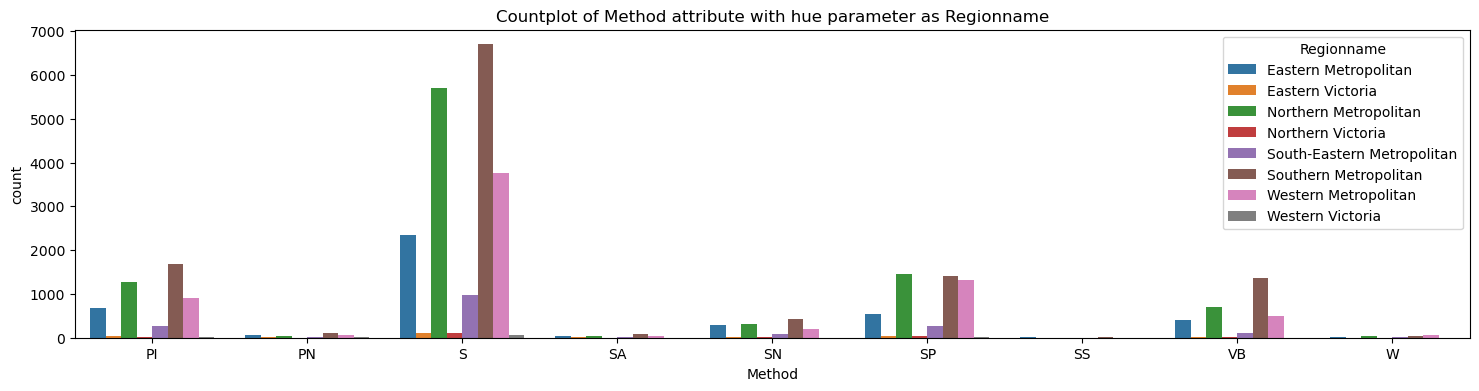

In [50]:
plt.figure(figsize=(18,4))
plt.title("Countplot of Method attribute with hue parameter as Type")
sns.countplot(data = data, x='Method', hue= 'Type')
plt.show()
plt.figure(figsize=(18,4))
plt.title("Countplot of Method attribute with hue parameter as Regionname")
sns.countplot(data = data, x='Method', hue= 'Regionname')
plt.show()

## Scatterplot

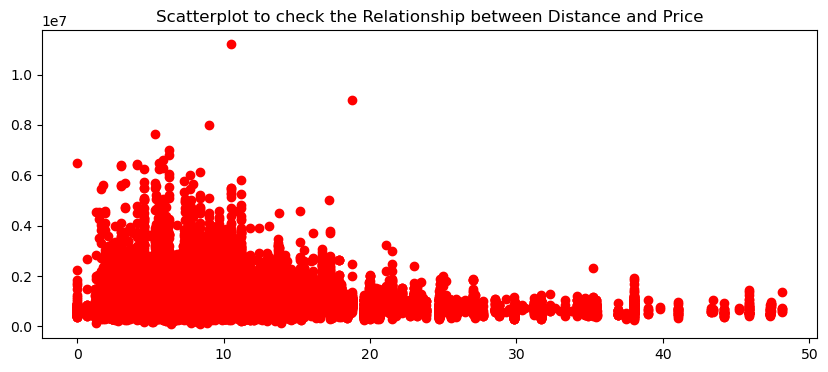

In [51]:
plt.figure(figsize=(10,4))
plt.scatter(data=data, x='Distance', y='Price', color='red')
plt.title('Scatterplot to check the Relationship between Distance and Price')
plt.show()

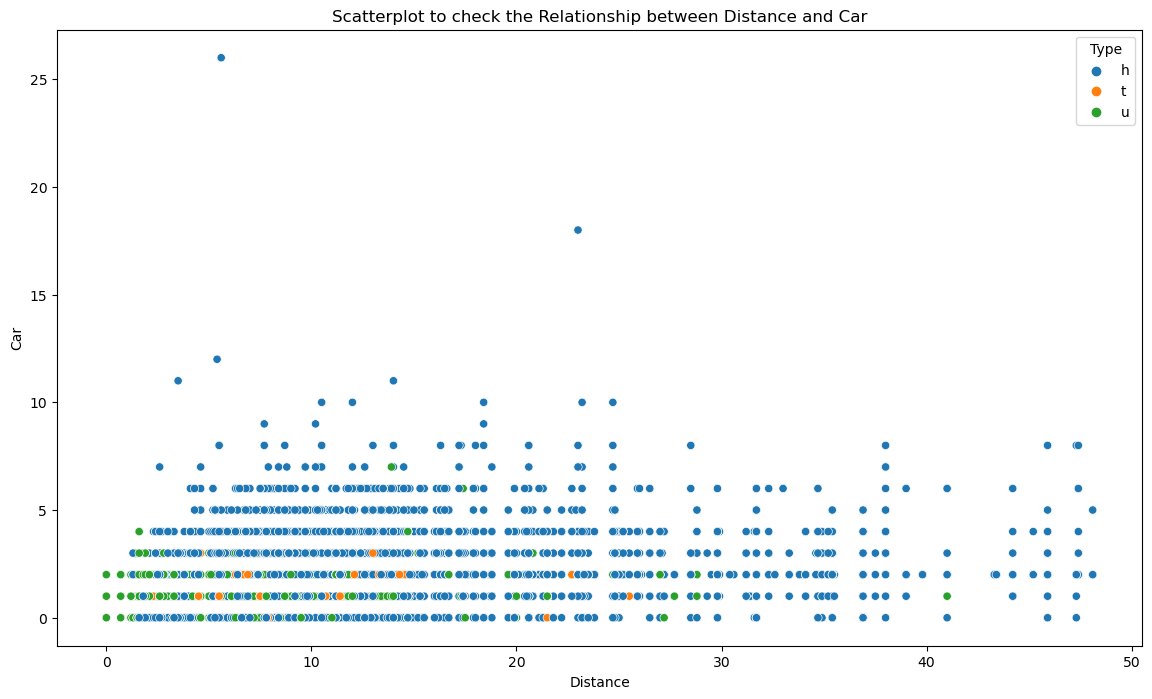

In [52]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=data, x='Distance', y='Car', hue='Type');
plt.title('Scatterplot to check the Relationship between Distance and Car')
plt.show()

## Lmplot

<Figure size 1000x500 with 0 Axes>

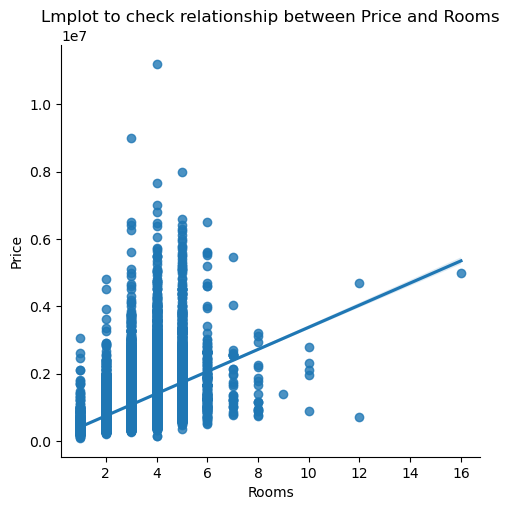

In [53]:
plt.figure(figsize=(10,5))
sns.lmplot(data=data, y='Price', x='Rooms');
plt.title('Lmplot to check relationship between Price and Rooms')
plt.show()

<Figure size 1000x500 with 0 Axes>

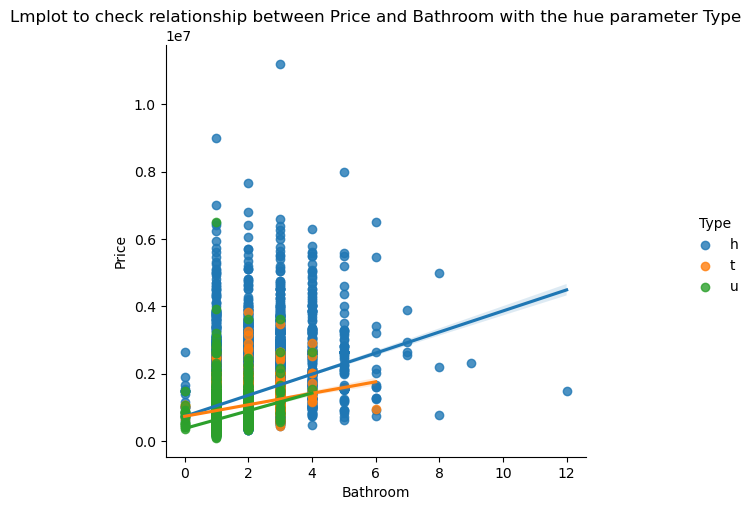

In [54]:
plt.figure(figsize=(10,5))
sns.lmplot(data=data, y='Price', x='Bathroom', hue='Type');
plt.title('Lmplot to check relationship between Price and Bathroom with the hue parameter Type')
plt.show()

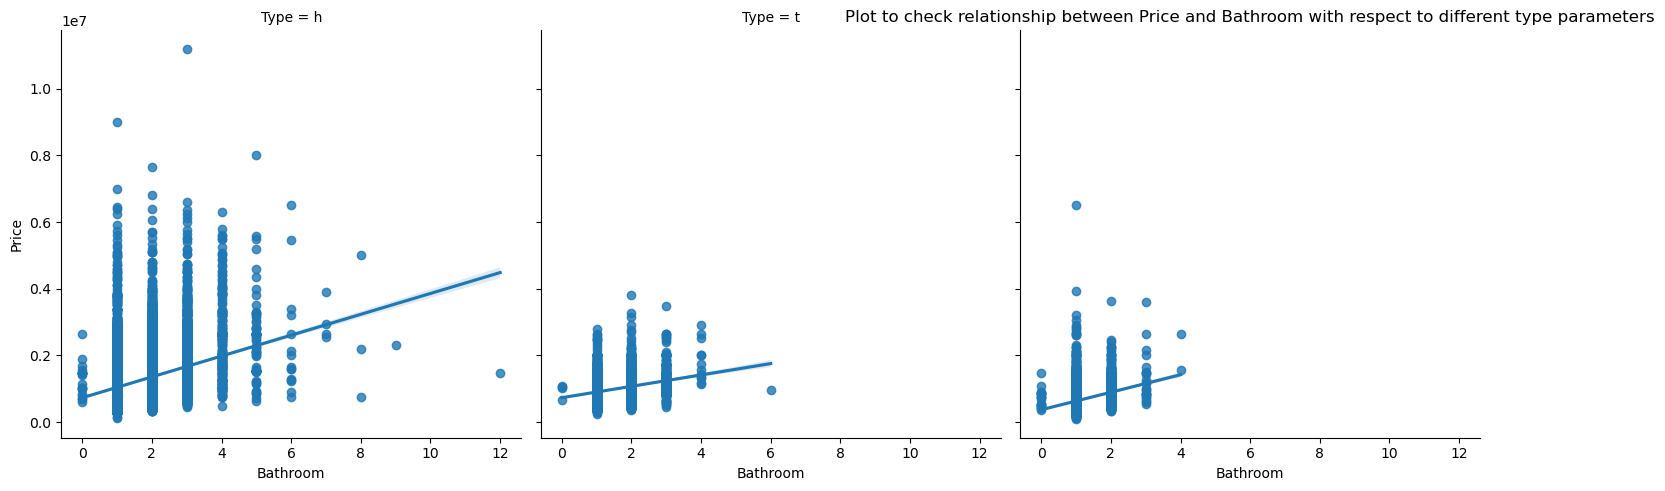

In [55]:
sns.lmplot(data=data, x='Bathroom', y='Price', col='Type');
plt.title('Plot to check relationship between Price and Bathroom with respect to different type parameters')
plt.show()

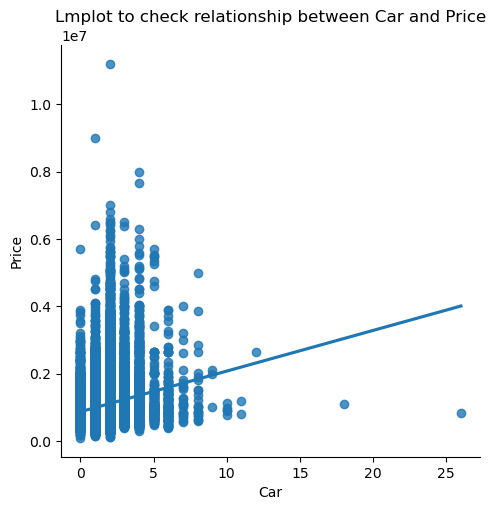

In [56]:
sns.lmplot(data=data, x='Car', y='Price', ci=False);
plt.title('Lmplot to check relationship between Car and Price')
plt.show()

## Jointplot

## Jointplot distribution represent the relation between Rooms and Price

<Figure size 1000x600 with 0 Axes>

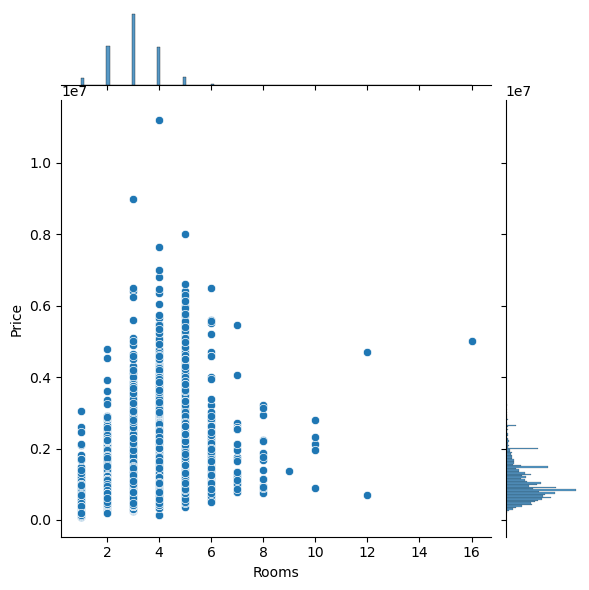

In [57]:
plt.figure(figsize=(10,6))
sns.jointplot(data=data, x='Rooms', y='Price');
plt.show()

<Figure size 1000x600 with 0 Axes>

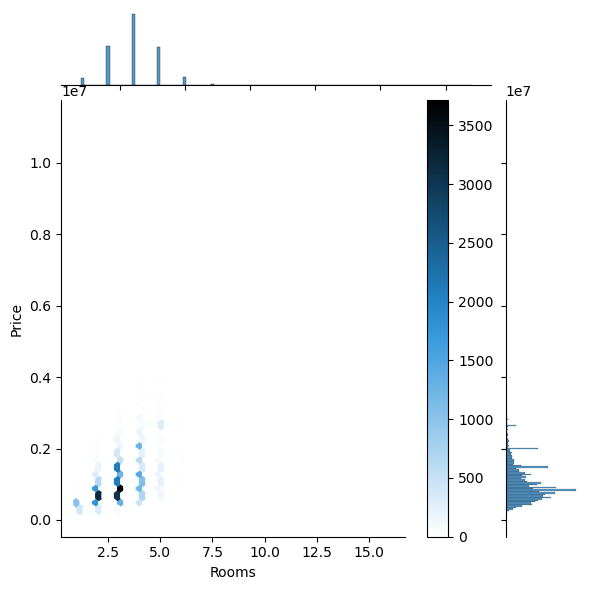

In [58]:
plt.figure(figsize=(10,6))
sns.jointplot(data=data, x='Rooms', y='Price', kind="hex");
plt.title('')
plt.colorbar();
plt.show()

## Pairplot

## Pairplot shows the relationship between the numerical variables such as Rooms, Bathroom, Car, Distance, Price

<Figure size 2000x1500 with 0 Axes>

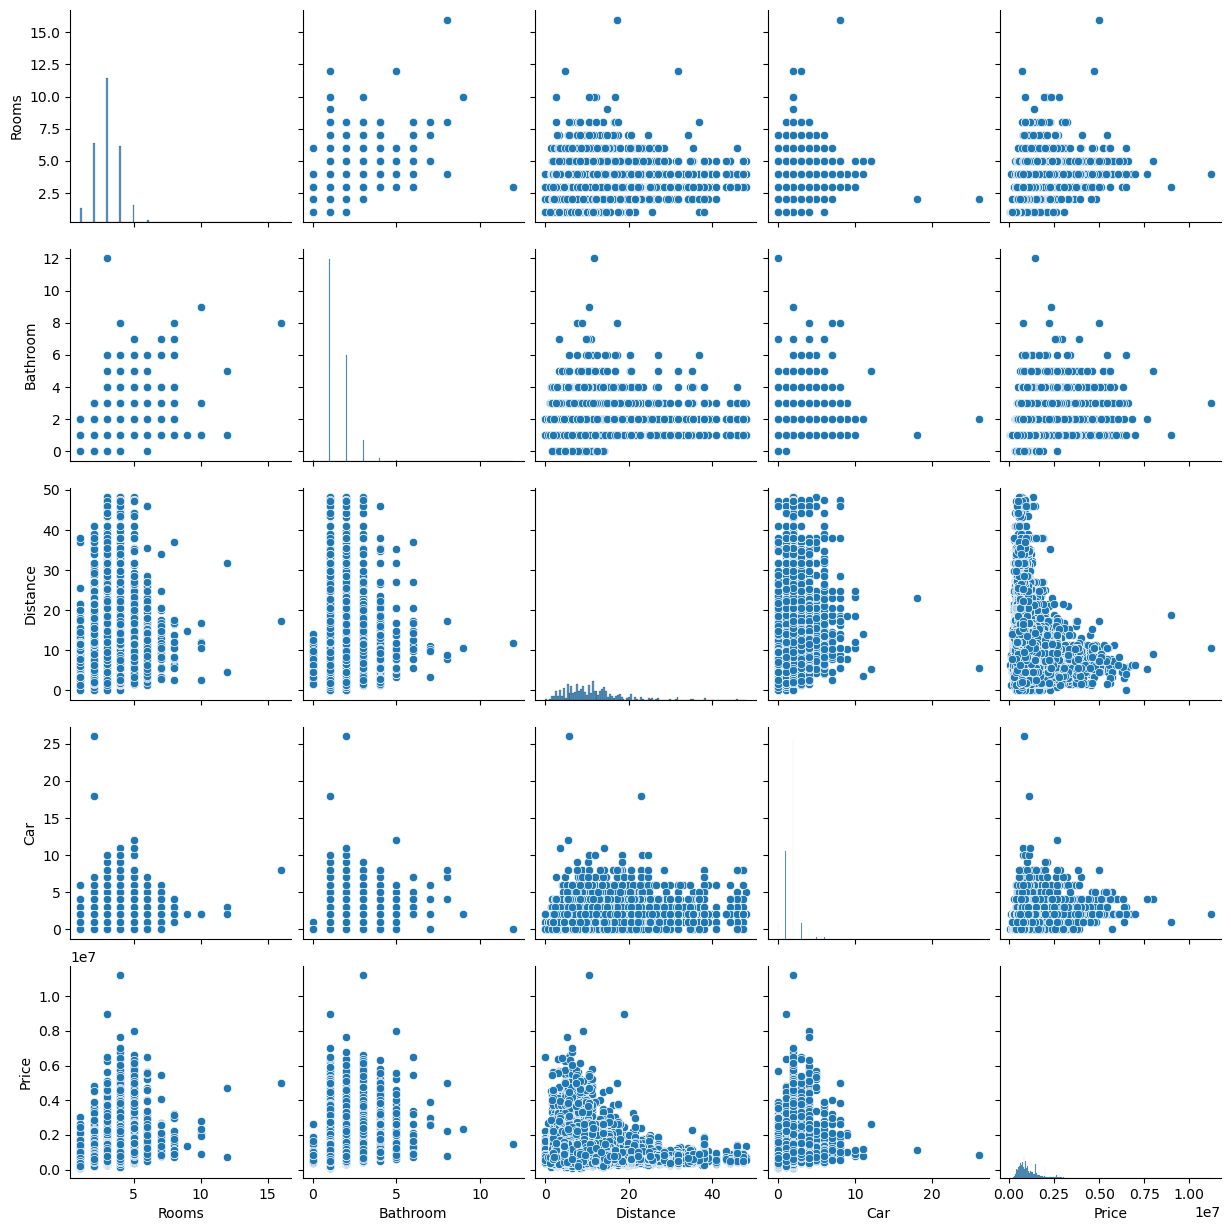

In [59]:
plt.figure(figsize=(20,15))
sns.pairplot(data=data[['Rooms','Bathroom','Distance','Car','Price']])
plt.show()

## Heatmap

<Axes: >

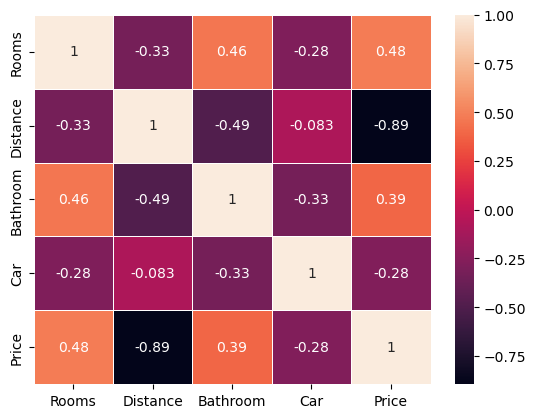

In [60]:
# Correlation Matrix
sns.heatmap(data.corr(numeric_only=True).corr(),annot=True, linewidths=.5)

## 3D Plot

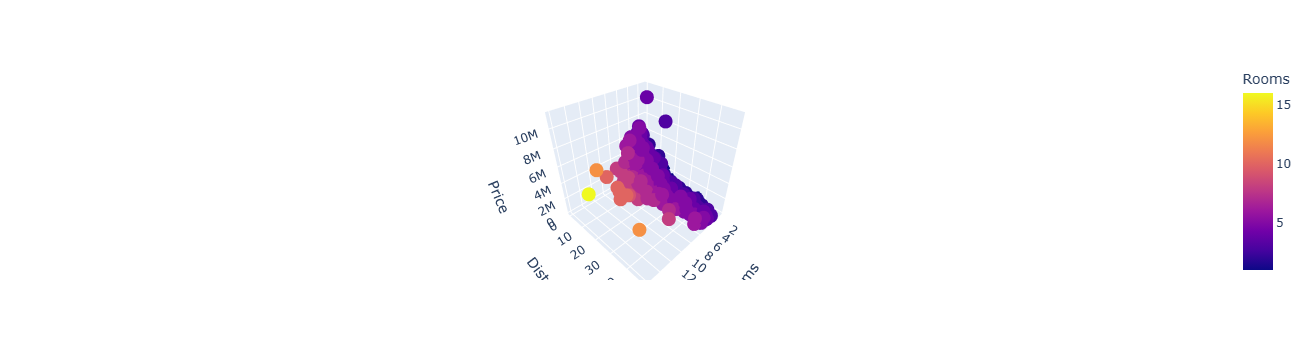

In [61]:
fig_3d = px.scatter_3d(data, x='Rooms', y='Distance', z='Price', color='Rooms')
fig_3d.show()
plt.show()

In [62]:
data.head()

Suburb  Rooms Type Method        SellerG  Distance  Bathroom  Car  \
0    Abbotsford      2    h     SS         Jellis       2.5       1.0  1.0   
1  Airport West      3    t     PI         Nelson      13.5       2.0  1.0   
2   Albert Park      2    h      S  hockingstuart       3.3       1.0  0.0   
3   Albert Park      2    h      S        Thomson       3.3       1.0  0.0   
4    Alphington      3    h     SN        McGrath       6.4       2.0  1.0   

                  CouncilArea             Regionname      ParkingArea  \
0          Yarra City Council  Northern Metropolitan          Carport   
1  Moonee Valley City Council   Western Metropolitan  Detached Garage   
2   Port Phillip City Council  Southern Metropolitan  Attached Garage   
3   Port Phillip City Council  Southern Metropolitan           Indoor   
4        Darebin City Council  Northern Metropolitan          Parkade   

          Price  
0  7.432265e+05  
1  8.400000e+05  
2  1.275000e+06  
3  1.455000e+06  
4  9.051467e+05

## Label Encoding

In [63]:
transformed_data=data.copy()
categorical_columns = data.select_dtypes(include="category").columns

le = LabelEncoder()

for i in categorical_columns:
    transformed_data[i]=le.fit_transform(transformed_data[i])

In [64]:
transformed_data.head()

Suburb  Rooms  Type  Method  SellerG  Distance  Bathroom  Car  CouncilArea  \
0       0      2     0       6      155       2.5       1.0  1.0           31   
1       2      3     1       0      227      13.5       2.0  1.0           22   
2       4      2     0       2      370       3.3       1.0  0.0           26   
3       4      2     0       2      329       3.3       1.0  0.0           26   
4       6      3     0       4      205       6.4       2.0  1.0            6   

   Regionname  ParkingArea         Price  
0           2            1  7.432265e+05  
1           6            2  8.400000e+05  
2           5            0  1.275000e+06  
3           5            3  1.455000e+06  
4           2            5  9.051467e+05

## Split dataset

In [65]:
X = transformed_data.drop(['Price'], axis = 1)
y = data['Price']

In [66]:
# Split the dataset into train and test sets with 80-20 ratio
X_train, X_test,y_train, y_test =train_test_split(X,y, test_size=0.2)

In [67]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data using the scaler to make the data between 0 and 1
scaled_training_data = scaler.fit_transform(X_train)

# Transform the test data, we use 'transform' method for scaling paramaters learned on the train data.
scaled_test_data = scaler.transform(X_test)

In [68]:
X_train.isnull().sum()

Suburb         0
Rooms          0
Type           0
Method         0
SellerG        0
Distance       0
Bathroom       0
Car            0
CouncilArea    0
Regionname     0
ParkingArea    0
dtype: int64

In [69]:
y_train.value_counts()

Price
1.470444e+06    951
2.024676e+06    751
9.051467e+05    602
8.407690e+05    586
1.017051e+06    394
               ... 
1.234000e+06      1
1.743000e+06      1
2.485000e+06      1
2.579500e+06      1
5.355000e+05      1
Name: count, Length: 2668, dtype: int64

## LinearRegression

In [70]:
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred_train = lin_mod.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_train,y_pred_train)
print("The r2 score is:", r2score)

Mean Squared error is : 211660792019.75714
Mean Absolute error is: 460066.0735370053
The r2 score is: 0.4473805330163573


In [72]:
y_pred = lin_mod.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred)
print("The r2 score is:", r2score)

Mean Squared error is : 211944330272.32724
Mean Absolute error is: 460374.1198985095
The r2 score is: 0.4548704531056398


## DecisionTree

In [73]:
dt_mod = DecisionTreeRegressor()
dt_mod.fit(X_train,y_train)

DecisionTreeRegressor()

In [74]:
y_pred = dt_mod.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred)
print("The R2 score is:", r2score)

Mean Squared error is : 215744532551.7745
Mean Absolute error is: 464483.0810177853
The R2 score is: 0.44509617632248544


In [75]:
y_pred_train = dt_mod.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_train,y_pred_train)
print("The R2 score is:", r2score)

Mean Squared error is : 4097283435.628198
Mean Absolute error is: 64010.02605551882
The R2 score is: 0.9893025129185645


In [76]:
hyp = {'criterion' : ['mse','friedman_mse','mae'],
      'max_depth' : np.arange(5,20),
      'min_samples_split': np.arange(5,10),
      'min_samples_leaf': np.arange(3,10)}

In [77]:
dt_mod = DecisionTreeRegressor()
gscv_dt_mod = GridSearchCV(dt_mod, hyp, cv = 7)
gscv_dt_mod.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([5, 6, 7, 8, 9])})

In [78]:
# Grid Search CV
dt_mod = DecisionTreeRegressor()

# Define the hyperparameters and their possible values to search over
param_grid = {
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_mod, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=7)

# Perform the grid search on your data
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 5}
Best RMSE Score: 350303.88402773364


In [79]:
selected_model = DecisionTreeRegressor( max_depth=10, min_samples_leaf= 9, min_samples_split=7)
final_model = selected_model.fit(X_train,y_train)
final_model_pred = final_model.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, final_model_pred)))

343805.32580877934


In [80]:
print("Final Model Mean Squared Error", mean_squared_error(y_test, final_model_pred))
print("Final Model Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, final_model_pred)))
print("Final Model Mean Absolute Error", mean_absolute_error(y_test, final_model_pred))
print("Final Model R2 Score", r2_score(y_test, final_model_pred))

Final Model Mean Squared Error 118202102054.48091
Final Model Root Mean Squared Error 343805.32580877934
Final Model Mean Absolute Error 213232.60860573323
Final Model R2 Score 0.6959793250797179


## KNN

In [81]:
knn_mod = KNeighborsRegressor()
knn_mod.fit(X_train,y_train)

KNeighborsRegressor()

In [82]:
y_pred = knn_mod.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean squared Error is:",mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred)
print("The R2 score is:", r2score)

Mean squared Error is: 194521728249.3206
Mean Absolute error is: 441046.1747360707
The R2 score is: 0.4996821031003291


In [83]:
y_pred_train = knn_mod.predict(X_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared Error is:",mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_train,y_pred_train)
print("The r2 score is:", r2score)

Mean squared Error is: 126063266500.20909
Mean Absolute error is: 355053.89238847827
The r2 score is: 0.6708648093263315


## RandomForest

In [84]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [85]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred)
print("The r2 score is:", r2score)


Mean Squared error is : 114834990686.71556
Mean Absolute error is: 338873.1188611979
The r2 score is: 0.7046396742001417


In [86]:
y_pred_train = rf_model.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_train,y_pred_train)
print("The r2 score is:", r2score)

Mean Squared error is : 20042050974.93906
Mean Absolute error is: 141569.95081915887
The r2 score is: 0.9476727483567388


## GradientBoostingRegression

In [87]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [88]:
y_pred = gb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_test,y_pred)
print("The R2 score is:", r2score)

Mean Squared error is : 114070878168.15598
Mean Absolute error is: 337743.80552151654
The R2 score is: 0.7066050030696778


In [89]:
y_pred_train = gb_reg.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared error is :", mse)

mae = np.sqrt(mse)
print("Mean Absolute error is:", mae)

r2score = r2_score(y_train,y_pred_train)
print("The R2 score is:", r2score)

Mean Squared error is : 112822530433.19171
Mean Absolute error is: 335890.652494516
The R2 score is: 0.7054346908712481


In [90]:
gb_reg = GradientBoostingRegressor()

# Define the hyperparameters and their possible values to search over
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 100, 200],
    'max_depth': [3, 4, 5], 
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

# Perform the grid search on your data
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best RMSE Score: 330893.9145926142


In [91]:
selected_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, 
                                           learning_rate=0.1, subsample=1)
final_model = selected_model.fit(X_train,y_train)
final_model_pred = final_model.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, final_model_pred)))

328327.3383076023


In [92]:
print("Final Model Mean Squared Error", mean_squared_error(y_test, final_model_pred))
print("Final Model Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, final_model_pred)))
print("Final Model Mean Absolute Error", mean_absolute_error(y_test, final_model_pred))
print("Final Model R2 Score", r2_score(y_test, final_model_pred))

Final Model Mean Squared Error 107798841080.15472
Final Model Root Mean Squared Error 328327.3383076023
Final Model Mean Absolute Error 199810.72422793333
Final Model R2 Score 0.722736940788859


## Interpretation